In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.nonparametric.api as smnp
from sklearn.linear_model import LinearRegression

In [2]:
cxt=pd.read_csv('data/cxtupdatearrayfmri.csv', index_col=[0], usecols=['sub', 'cond', 'cxt', 'block', 'response', 'RT', 
                                                                  'updatedistraw', 'luredistfix', 'distfix'])

In [3]:
cxt_short=pd.read_csv('data/cxtupdateEPIyoungold.csv', index_col=[0], usecols=['sub', 'cond', 'recogcxt', 'subgroup', 
                                                                          'block', 'response', 'RT', 'updatedistraw', 
                                                                          'luredistfix', 'distfix'])

In [4]:
def clean_cxt_data(cxt, cxt_short):
    cxt_short.rename(columns={'recogcxt':'cxt'}, inplace=True)
    cxt_short = cxt_short[cxt_short['subgroup']=='young']
    cxt_short['cxt'] = cxt_short['cxt'].map({'Cxt1':0, 'Cxt2':1})
    cxt_short.drop('subgroup', axis=1, inplace=True)
    cxt['cxt'] = cxt['cxt'].map({'Cxt A':0, 'Cxt B':1})

    new_cxt = cxt.append(cxt_short)
    new_cxt['exp_screen_size'] = new_cxt.index<800
    new_cxt['exp_screen_size'] = new_cxt['exp_screen_size'].map({True:0, False:1})
    new_cxt['cond']=new_cxt['cond'].map({'active':0, 'passive':1})
    new_cxt = new_cxt[new_cxt['distfix']==1]
    new_cxt = new_cxt[new_cxt['response']>0]
    new_cxt = new_cxt[new_cxt['RT']<20000]
    return new_cxt
cxt = clean_cxt_data(cxt, cxt_short)
cxt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,cond,cxt,block,response,RT,updatedistraw,luredistfix,distfix,exp_screen_size
sub,,,,,,,,,
401,0,1,1,2,49.0,257.0,90,1,0
401,0,0,1,1,95.0,364.0,90,1,0
401,0,0,1,1,32.0,101.0,90,1,0
401,0,0,1,2,33.0,610.0,90,1,0
401,0,1,1,2,49.0,346.0,90,1,0
401,0,0,1,1,28.0,183.0,90,1,0
401,0,1,1,1,29.0,509.0,90,1,0
401,0,0,1,1,42.0,665.0,90,1,0
401,0,1,1,1,61.0,740.0,90,1,0


In [5]:
def get_response_counts(new_cxt):
    response = new_cxt.groupby(['sub', 'cond', 'cxt', 'response'])
    response_counts = pd.DataFrame()
    for ind, row in response:
        sub, cond, cxt, response = ind
        count=row['response'].count()
        cond_map = {0:'act', 1:'pas'}
        cond_name = cond_map[cond]
        colname = f'{cond_name}_cxt{cxt}_loc{response}'
        response_counts.loc[sub,colname]=count
    response_counts.fillna(value=0, inplace=True)
    for cond in ['act', 'pas']:
        for cxt in [0,1]:
            new_col=f'{cond}_cxt{cxt}_all'
            col_list= [f'{cond}_cxt{cxt}_loc{loc}' for loc in range(1,4)]
            response_counts[new_col] = response_counts[col_list].sum(axis=1)
    return response_counts
response_counts = get_response_counts(cxt)


In [13]:
def get_prop(response_counts):
    widedf = pd.DataFrame()
    tidydf = pd.DataFrame()
    conddf = pd.DataFrame()
    for cond in ['act', 'pas']:
        for cxt in [0,1]:
            for loc in range(1,4):
                col = f'{cond}_cxt{cxt}_loc{loc}'
                total_col = f'{cond}_cxt{cxt}_all'
                widedf[col] = response_counts[col]/response_counts[total_col]

                conddf['prop'] = response_counts[col]/response_counts[total_col]
                conddf['locs'] = loc
                conddf['cxt']=cxt
                conddf['cond']=cond
                tidydf=tidydf.append(conddf)
    return widedf, tidydf
props_wide, props_tidy = get_prop(response_counts)
props_tidy['cond']=props_tidy['cond'].map({'act':'Active', 'pas':'Passive'})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


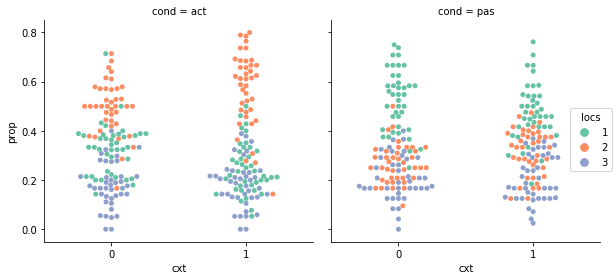

In [14]:
sns.factorplot(x='cxt', y='prop', hue='locs', col='cond', data=props_tidy, kind='swarm', palette='Set2')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


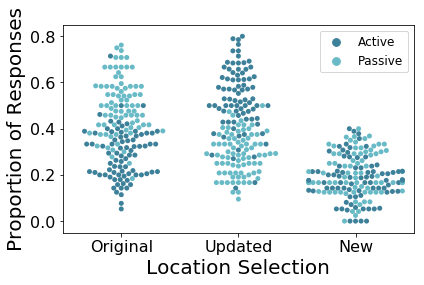

In [24]:
from matplotlib import rcParams


rcParams.update({'figure.autolayout': True})

ax=sns.swarmplot(x='locs', y='prop', hue='cond', data=props_tidy, palette='GnBu_d')
plt.xticks((0,1,2),['Original', 'Updated', 'New'])
# plt.ylabel('Proportion of Responses', fontsize=20)
# plt.xlabel('Location Selection', fontsize=20)

ax.set_xlabel('Location Selection', fontsize=20)
ax.set_ylabel('Proportion of Responses', fontsize=20)
ax.tick_params(labelsize=16)
# plt.title('Precision', fontsize=30)
plt.gca().legend().set_title('')
plt.legend(fontsize=12)
plt.show()
swarm=ax.get_figure()
swarm.savefig('figs/cxtup_swarm.png')

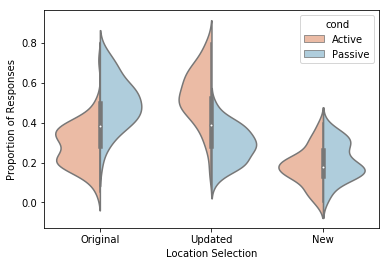

In [70]:
viosplit=sns.violinplot(x='locs', y='prop', hue='cond', split=True,  data=props_tidy, palette='RdBu')
plt.xticks((0,1,2),['Original', 'Updated', 'New'])
plt.ylabel('Proportion of Responses')
plt.xlabel('Location Selection')
viosplit=viosplit.get_figure()
viosplit.savefig('figs/cxt_viosplit.png')

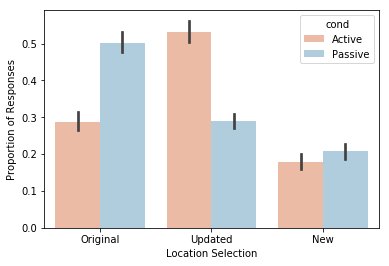

In [71]:
bar=sns.barplot(x='locs', y='prop', hue='cond', data=props_tidy, palette='RdBu')
plt.xticks((0,1,2),['Original', 'Updated', 'New'])
plt.ylabel('Proportion of Responses')
plt.xlabel('Location Selection')
bar=bar.get_figure()
bar.savefig('figs/cxt_bar.png')


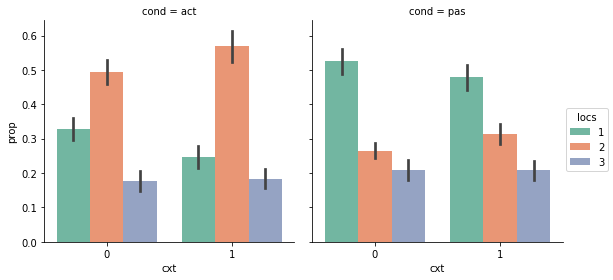

In [97]:
sns.factorplot(x='cxt', y='prop', hue='locs', col='cond', data=props_tidy, kind='bar', palette='Set2')

In [16]:
y_act=act['response']
X_act=act.drop(['response', 'cond'], axis=1)

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X_act,y_act, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

0.5564263322884012

In [18]:
forest.predict(X_test)

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [20]:
scores=list(zip(X_act.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X_act.columns)
scores=scores.sort_values(ascending=False)
scores

updatedistraw      0.421257
RT                 0.317161
block              0.135925
cxt                0.067696
exp_screen_size    0.038786
luredistfix        0.019175
distfix            0.000000
dtype: float64

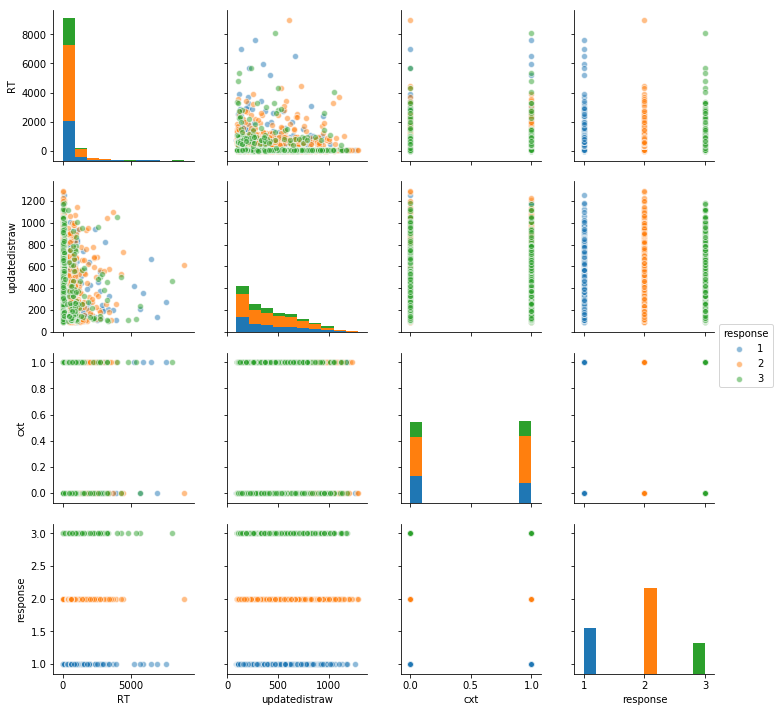

In [25]:
sns.pairplot(data=act[['RT', 'updatedistraw','cxt', 'response']], plot_kws={'alpha':.5}, hue='response')

In [34]:
y_pas=pas['response']
X_pas=pas.drop(['response', 'cond'], axis=1)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X_pas,y_pas, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

0.48350253807106597

In [37]:
forest.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,

In [36]:
scores=list(zip(X_pas.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X_pas.columns)
scores=scores.sort_values(ascending=False)
scores

RT                 0.389179
updatedistraw      0.341136
block              0.109801
exp_screen_size    0.073902
cxt                0.068095
luredistfix        0.017887
distfix            0.000000
dtype: float64

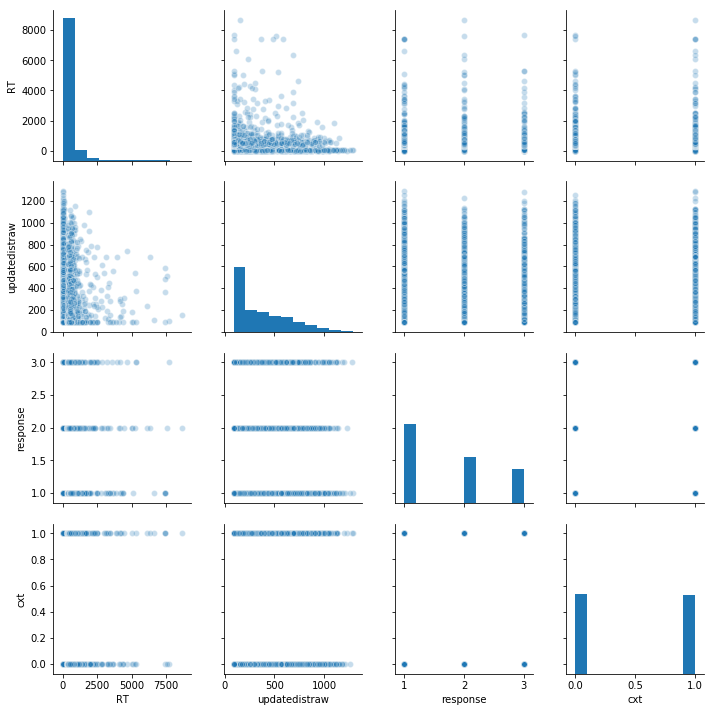

In [38]:
sns.pairplot(data=pas[['RT', 'updatedistraw', 'response', 'cxt']], plot_kws={'alpha':.25})